In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions.plot_graphics import diff_ventas_facturacion, demanda, plot_packs, facturacion, top3_ventas_facturacion
from functions.plt_eda_powerpoint import pw_packs, pw_top_ventas, pw_top_facturacion, pw_diff_fechas, pw_facturacion_anual, pw_mejor_peor_facturacion
from functions.top_courses import top_courses
from functions.times import times

c_med = '#008B8B'

In [2]:
data_raw = pd.read_csv('../data/preprocessed/preprocessed_data.csv', index_col=0, parse_dates=['Order Date'])
print(data_raw.shape)
data_raw.head()

(489759, 8)


,User ID,Order Date,Product,Course,Category,CR,H,Current Value
0,1150817,2017-03-02,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
1,1255116,2017-03-22,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,0.0
2,1280376,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
3,1282143,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
4,1282191,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0


<br>

# Obtener información de los datos

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489759 entries, 0 to 489758
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User ID        489759 non-null  int64         
 1   Order Date     489759 non-null  datetime64[ns]
 2   Product        489759 non-null  object        
 3   Course         489759 non-null  object        
 4   Category       489759 non-null  object        
 5   CR             489759 non-null  float64       
 6   H              489759 non-null  float64       
 7   Current Value  489759 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 33.6+ MB


- No hay valores nulos
- Tengo columnas en formato ``fecha``, ``float``, ``int`` y ``str``

<br>


In [4]:
data_raw.astype(str).describe()

,User ID,Order Date,Product,Course,Category,CR,H,Current Value
count,489759,489759,489759,489759,489759,489759,489759,489759
unique,208453,2307,209,52,8,36,10,49
top,10586797,2020-03-25,Hpv: Cribado Del Cáncer De Cérvix,Hpv: Cribado Del Cáncer De Cérvix,Enfermería Básica,2.9,25.0,0.0
freq,44,5804,48875,141011,243028,141185,145060,394739


- No hay columnas con valores únicos.
- El precio de venta más frecuente es de 0€. Esto debo revisarlo para ver cómo va a afectar al análisis y lo consultaré con Marketing.

<br>

In [5]:
data_raw.describe()

,User ID,Order Date,CR,H,Current Value
count,4.897590e+05,489759,489759.000000,489759.000000,489759.000000
mean,2.692273e+07,2020-12-06 00:18:00.531445504,3.812609,31.855310,7.830781
min,2.143840e+05,2017-03-02 00:00:00,0.000000,0.000000,0.000000
25%,5.555611e+06,2019-11-18 00:00:00,2.900000,25.000000,0.000000
50%,1.329928e+07,2020-09-03 00:00:00,3.400000,25.000000,0.000000
75%,3.612078e+07,2022-03-01 00:00:00,5.300000,45.000000,0.000000
max,1.822010e+08,2023-09-13 00:00:00,9.100000,70.000000,249.000000
std,3.157121e+07,NaN,2.497191,20.352189,19.359538


- En el percentil 75 sigue siendo el valor más frecuente en la distribución de los datos un valor de cero para la columna `Current Value`. Esto me indica que más del 75% de los datos en esta columna el valor es de 0€.
- La data está fechada desde 2017 hasta septiembre de 2023.

<br>

<br>

# Plotear primeros gráficos

<br>

### Facturación

Hay que tener en cuenta que la base de datos sólo tiene datos hasta mitad de septiembre para el año 2023, por lo que las representaciones gráficas para Octubre, Noviembre y Dicembre se deberían coger con pinzas.

Otra cosa bastante importante es ver si la facturación depende de fechas. Es decir, encontrar modas y tendencias en los datos.

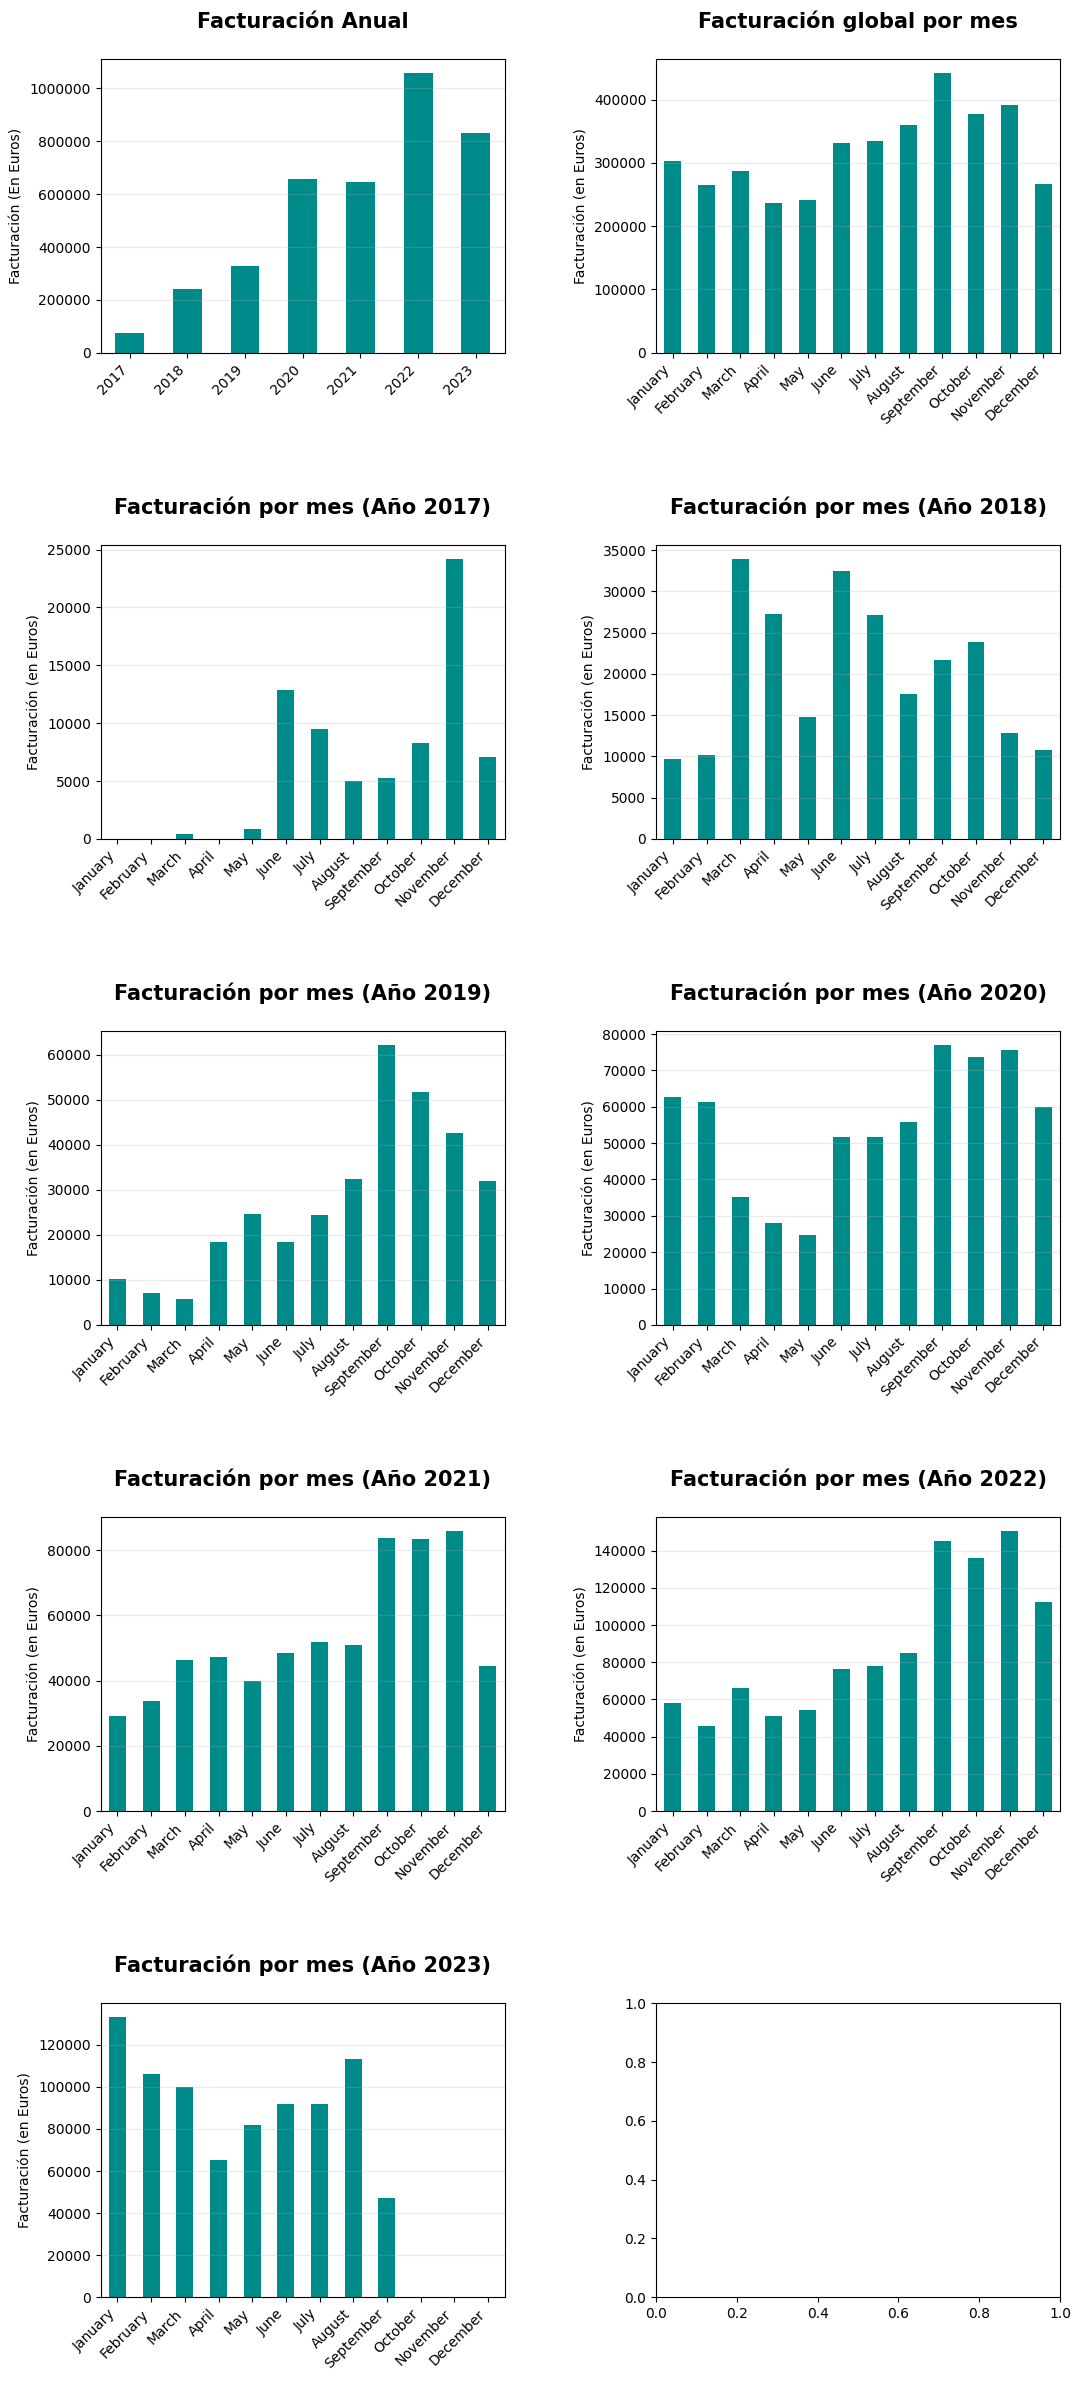

In [6]:
facturacion(data_raw)

<br>

### Encontrar dónde está la demanda

Queremos saber qué cursos demanda la gente y cuánta facturación dejan.

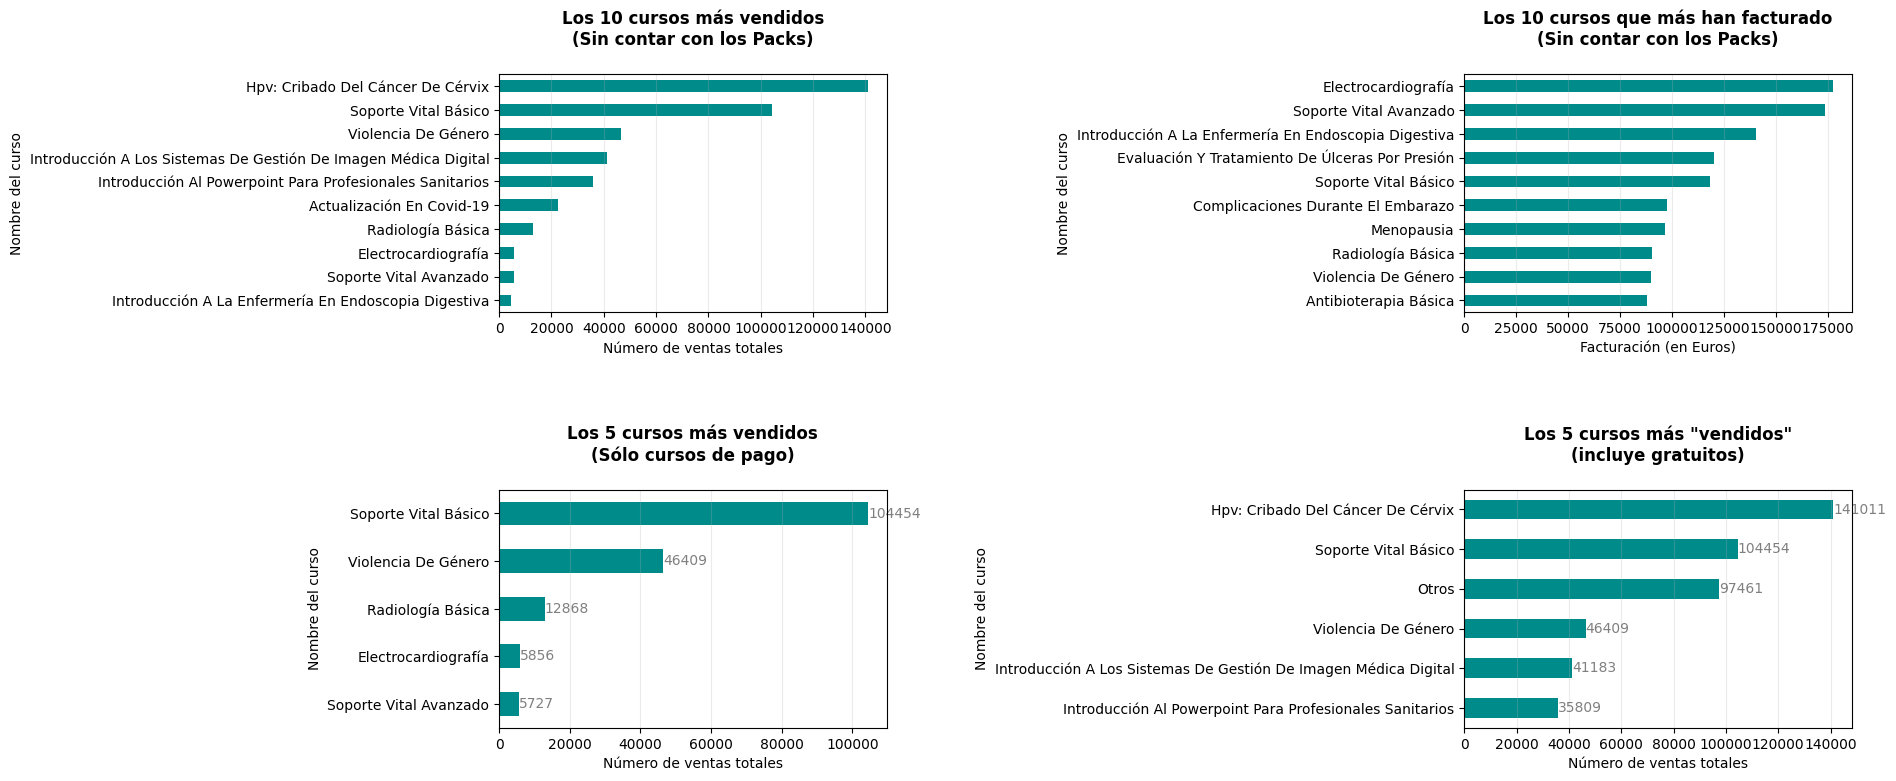

In [7]:
demanda(data_raw)

<br>

### ¿Qué hay de los packs?

En marketing no quieren datos de los packs porque el propósito de este proyecto es crear una secuencia de recomendación, por lo que sólo quieren saber datos de cada curso por individual. Pero es importante saber cuál es el tamaño en facturación que representan los packs en el groso de la facturación total.

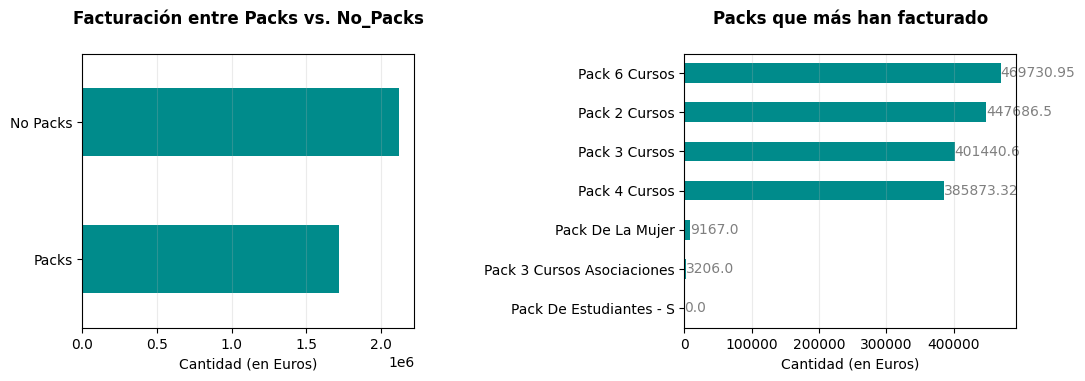

In [8]:
plot_packs(data_raw)

### Diferencia entre Ventas y Facturación por Usuario

Hay una gran diferencia entre los cursos más vendidos y los cursos que más han facturado, puesto que más del 75% de los datos tienen un valor de cero euros.

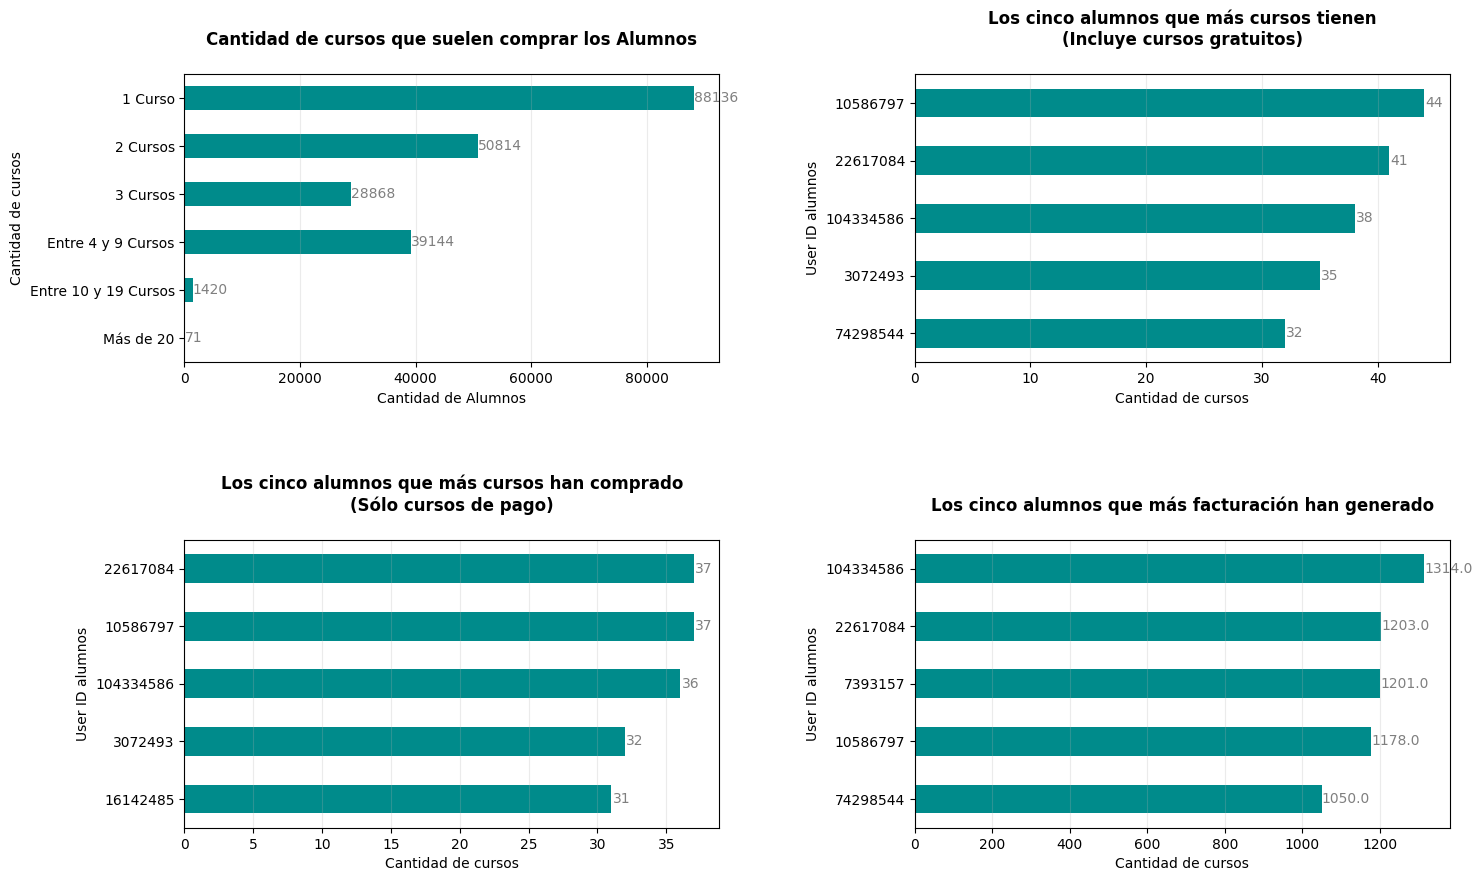

In [9]:
diff_ventas_facturacion(data_raw)

<br>

### Facturación por mes de los tres cursos que más facturan. ¿Hay modas?

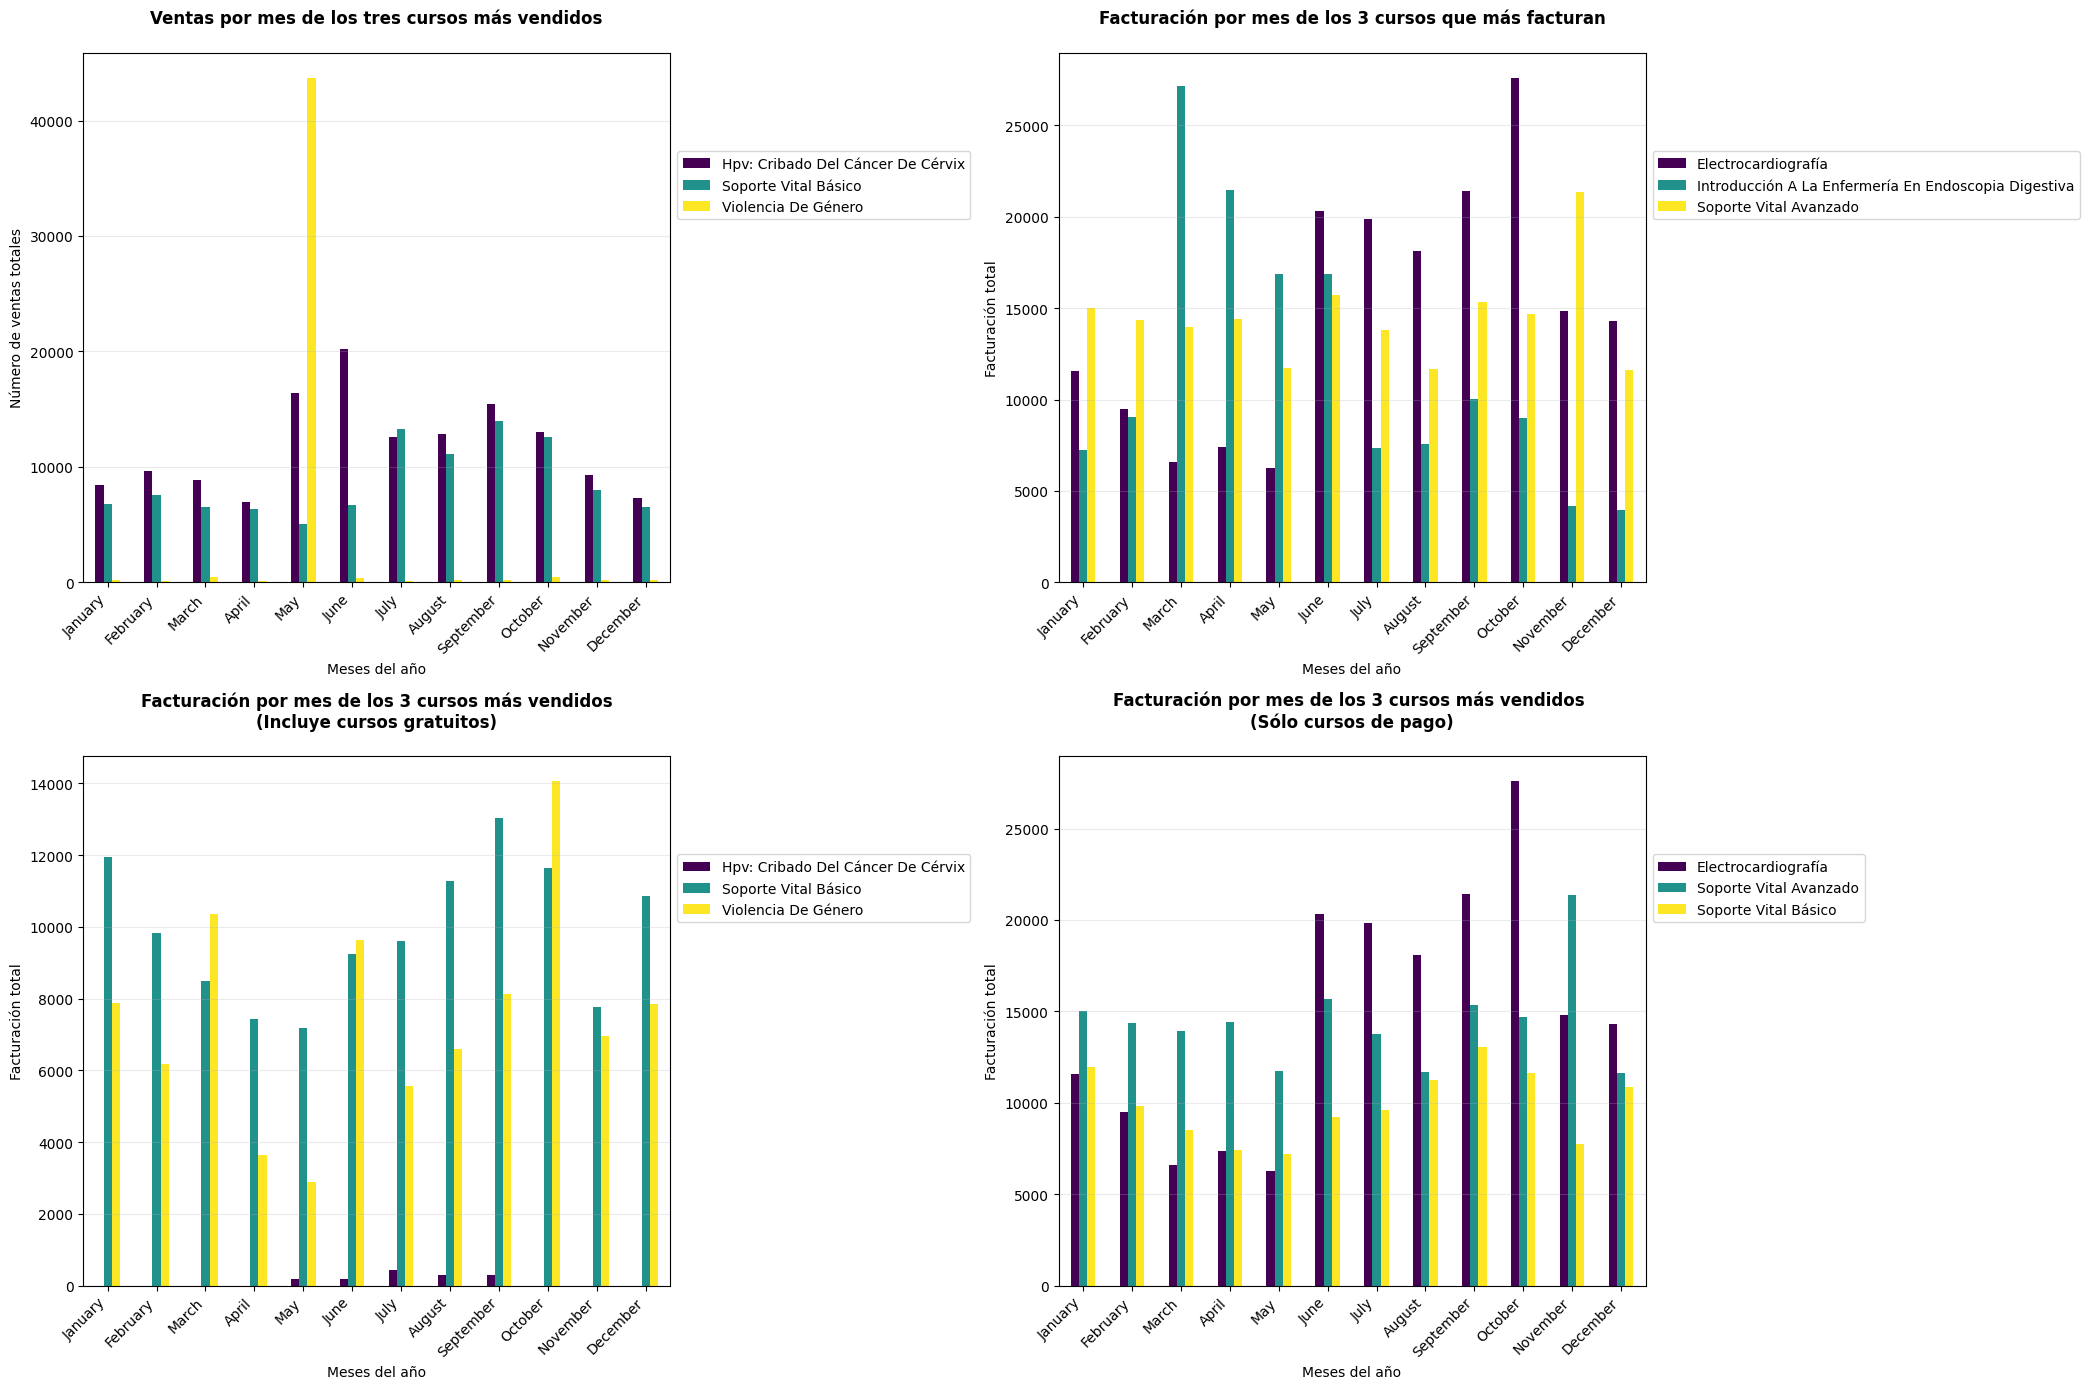

In [10]:
top3_ventas_facturacion(data_raw)

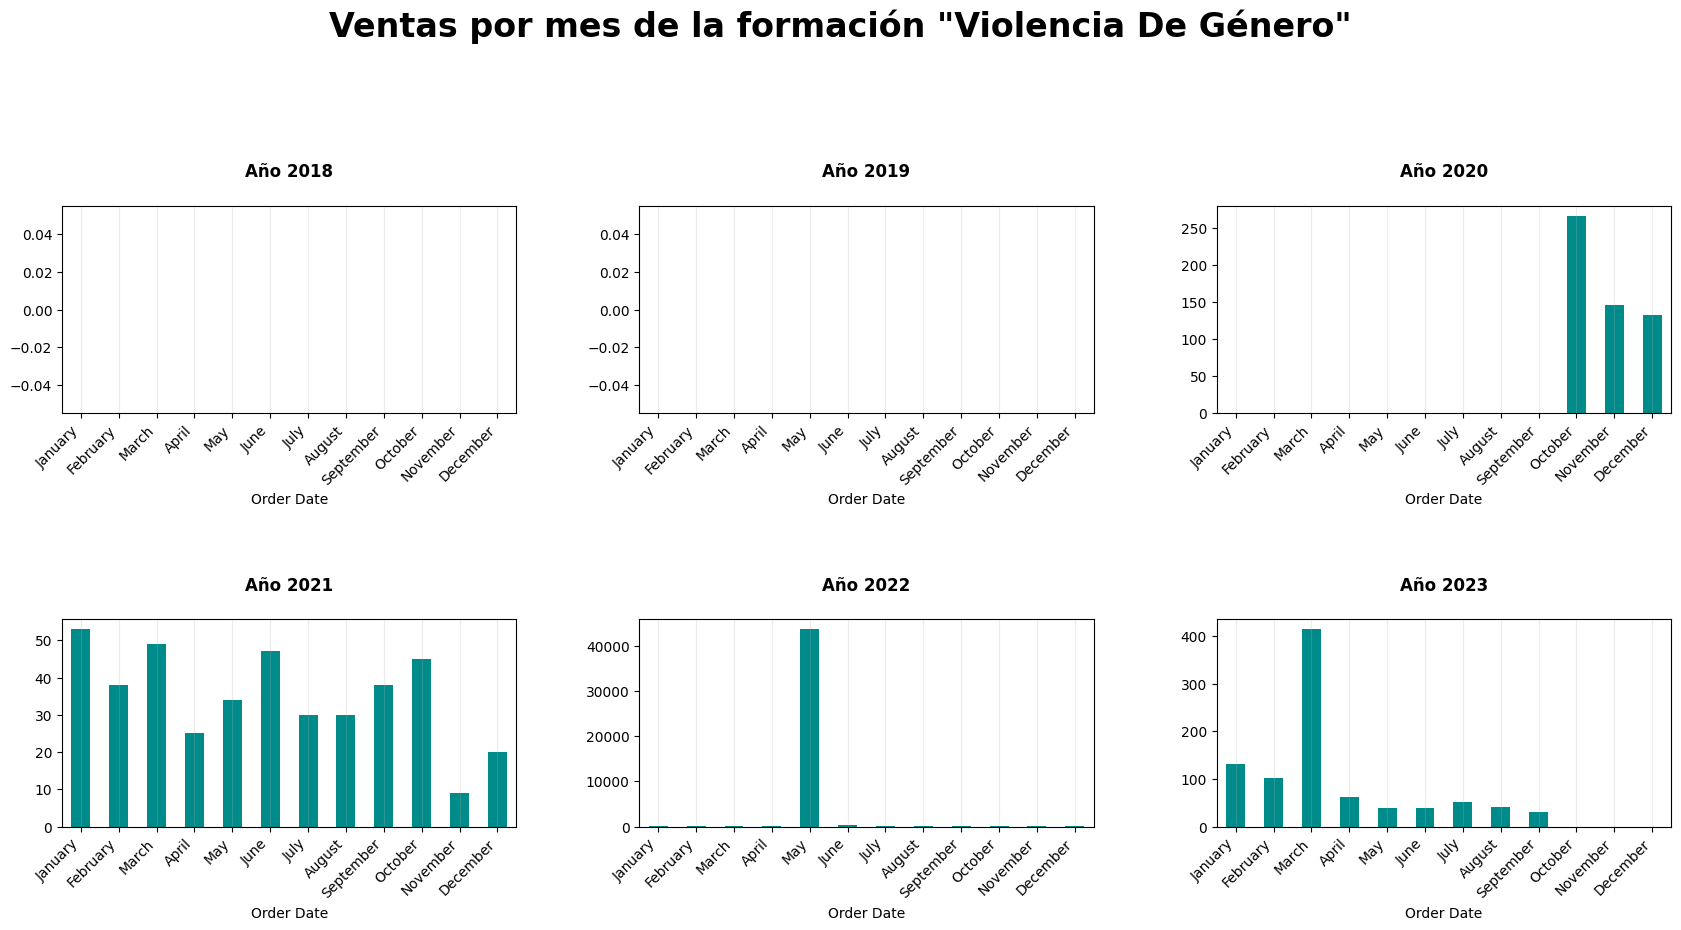

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.suptitle('Ventas por mes de la formación "Violencia De Género"', fontsize=24, fontweight='bold')

def generar_grafico(anio, ax_row, ax_col):
    nombre_meses = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December']
    vio_gen = data_raw[data_raw['Course']=='Violencia De Género']
    vio_gen_plot = vio_gen[vio_gen['Order Date'].dt.year==anio]
    vio_gen_plot = vio_gen_plot.groupby(vio_gen_plot['Order Date'].dt.month_name()).size()
    vio_gen_plot = vio_gen_plot.reindex(nombre_meses)
    vio_gen_plot.plot(kind='bar', color=c_med, ax=axs[ax_row, ax_col])
    axs[ax_row, ax_col].grid(axis='x', alpha=0.25)
    axs[ax_row, ax_col].set_title(f'Año {anio}\n', fontweight='bold')
    axs[ax_row, ax_col].tick_params(axis='x', rotation=45)
    axs[ax_row, ax_col].set_xticklabels(axs[ax_row, ax_col].get_xticklabels(), ha='right')

# GRÁFICOS
generar_grafico(2018, 0, 0)
generar_grafico(2019, 0, 1)
generar_grafico(2020, 0, 2)
generar_grafico(2021, 1, 0)
generar_grafico(2022, 1, 1)
generar_grafico(2023, 1, 2)

plt.tight_layout(pad=5);

¿Qué ocurrió en Mayo de 2022? ¿Hicieron una campaña de Marketing? ¿Cómo es posible que se vendieran 40.000 cursos de "Violencia de Género"?

In [12]:
condicion = (data_raw['Course']=='Violencia De Género') & (data_raw['Order Date'].dt.year==2020)
facturacion = data_raw[condicion]['Current Value'].sum()

print('Facturación total de la formación "Violencia De Género" en el año 2022:', facturacion)

Facturación total de la formación "Violencia De Género" en el año 2022: 15834.0


<br>

### Mostrar los cinco cursos que más han facturado por cada año


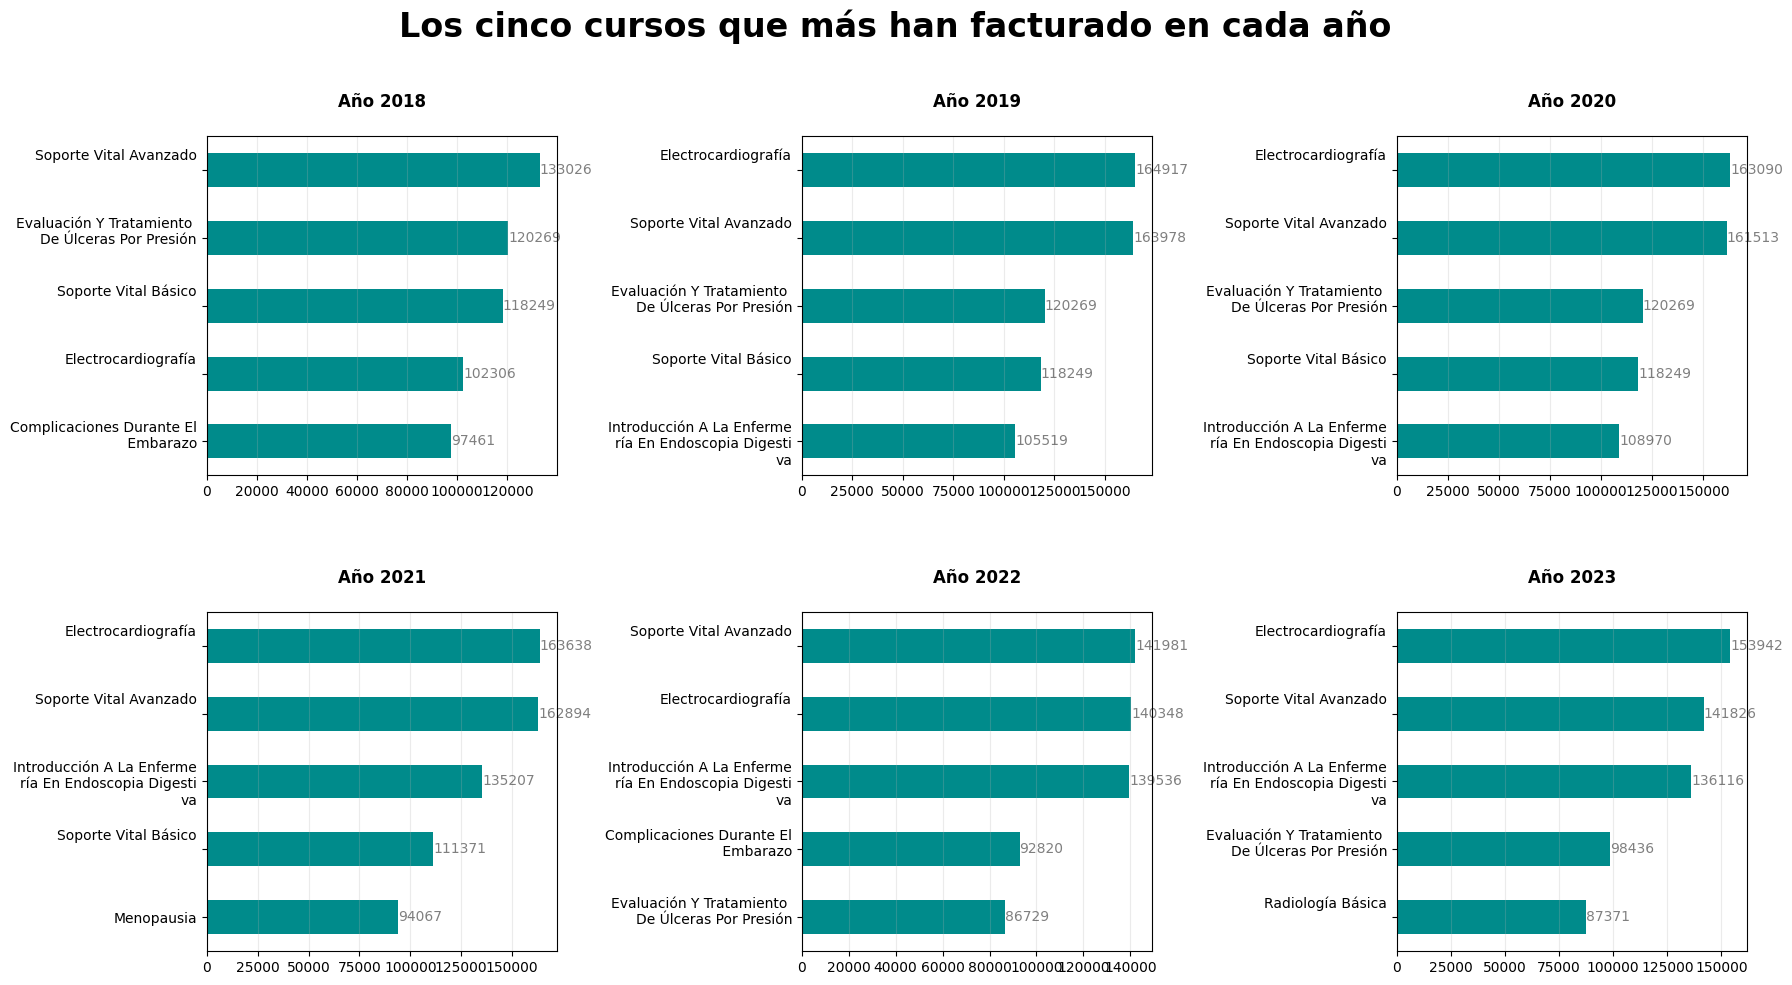

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

plt.suptitle('Los cinco cursos que más han facturado en cada año\n', fontsize=24, fontweight='bold')

def generar_grafico(anio, ax_row, ax_col):
    df = data_raw.groupby([data_raw['Order Date'].dt.year==anio, 'Course'])['Current Value'].sum().reset_index(level=1)
    df = df[df['Course'] != 'Pack']
    df = df.sort_values(by='Current Value', ascending=False)
    df = df.head().sort_values(by='Current Value')
    df.plot(kind='barh', x='Course', y='Current Value', legend=None, ax=axs[ax_row, ax_col], ylabel='', color=c_med)
    for i, v in enumerate(df['Current Value']):
        axs[ax_row, ax_col].text(v + 0.1, i, str(f"{v:.0f}"), color='black', va='center', ha='left', alpha=0.5)
    yticklabels = [label[:25] + '\n' + label[25:50] + '\n' + label[50:] if len(label) > 10 else label for label in df['Course']]
    axs[ax_row, ax_col].set_yticklabels(yticklabels)
    axs[ax_row, ax_col].grid(axis='x', alpha=0.25)
    axs[ax_row, ax_col].set_title(f'Año {anio}\n', fontweight='bold')

# GRÁFICOS
generar_grafico(2018, 0, 0)
generar_grafico(2019, 0, 1)
generar_grafico(2020, 0, 2)
generar_grafico(2021, 1, 0)
generar_grafico(2022, 1, 1)
generar_grafico(2023, 1, 2)


plt.tight_layout(h_pad=5)

<br>

# EDA POWERPOINT

Ya tenemos una perspectiva amplia del comportamiento de compra de los alumnos y de algunas tendencias. Ahora vamos a entrar a un análisis más exhaustivo.

No nos interesa trabajar con las formaciones gratuitas, por lo que las filtraremos para trabajar únicamente con las formaciones de pago.

In [3]:
data_fact = data_raw[data_raw['Current Value']>0].reset_index(drop=True)
print(data_fact.shape)
data_fact.head()

(95020, 8)


,User ID,Order Date,Product,Course,Category,CR,H,Current Value
0,1150817,2017-03-02,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
1,1280376,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
2,1282143,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
3,1282191,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
4,1279577,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0


<br>

### Categoría Packs

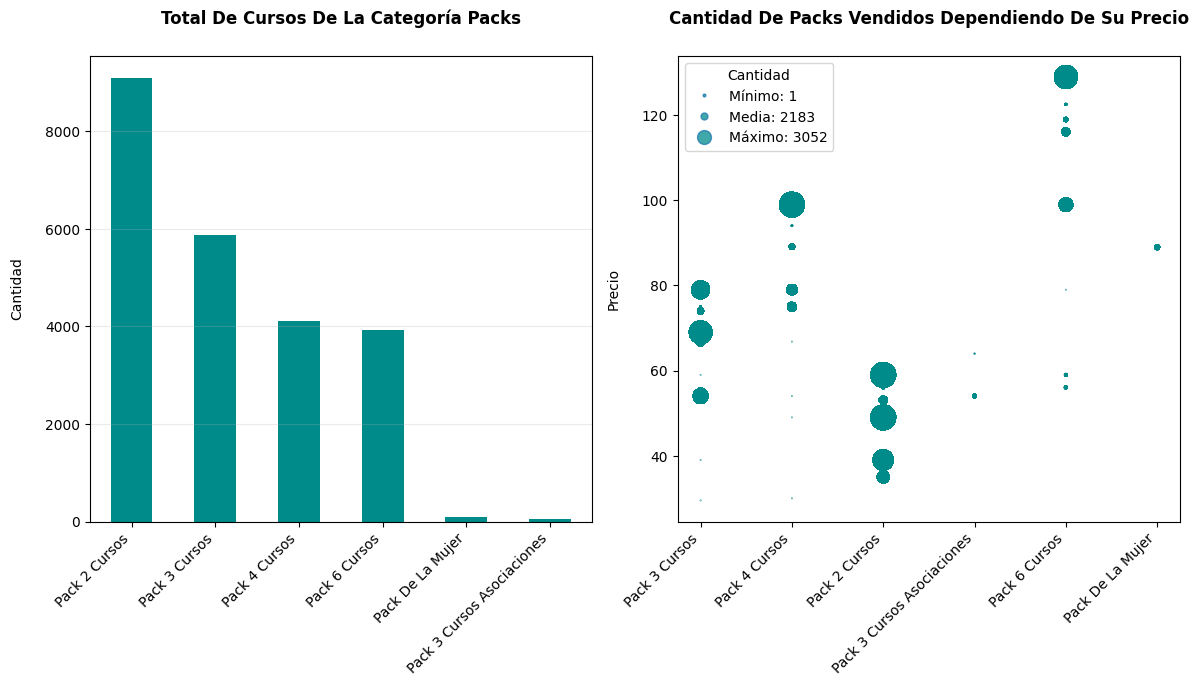

In [19]:
pw_packs(data_fact)

<br>

### Filtrar también la categoría Packs del dataset

Marketing tampoco quiere trabajar con los packs, así que también los filtraremos.

In [4]:
data_fact_wo_pack = data_fact[data_fact['Course']!='Pack'].reset_index(drop=True)
print(data_fact_wo_pack.shape)
data_fact_wo_pack.head()

(71858, 8)


,User ID,Order Date,Product,Course,Category,CR,H,Current Value
0,1150817,2017-03-02,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
1,1280376,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
2,1282143,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
3,1282191,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0
4,1279577,2017-03-27,Soporte Vital Avanzado (En Proceso De Sustituc...,Soporte Vital Avanzado,Enfermería Básica,9.0,70.0,5.0


<br>

### Top Ventas

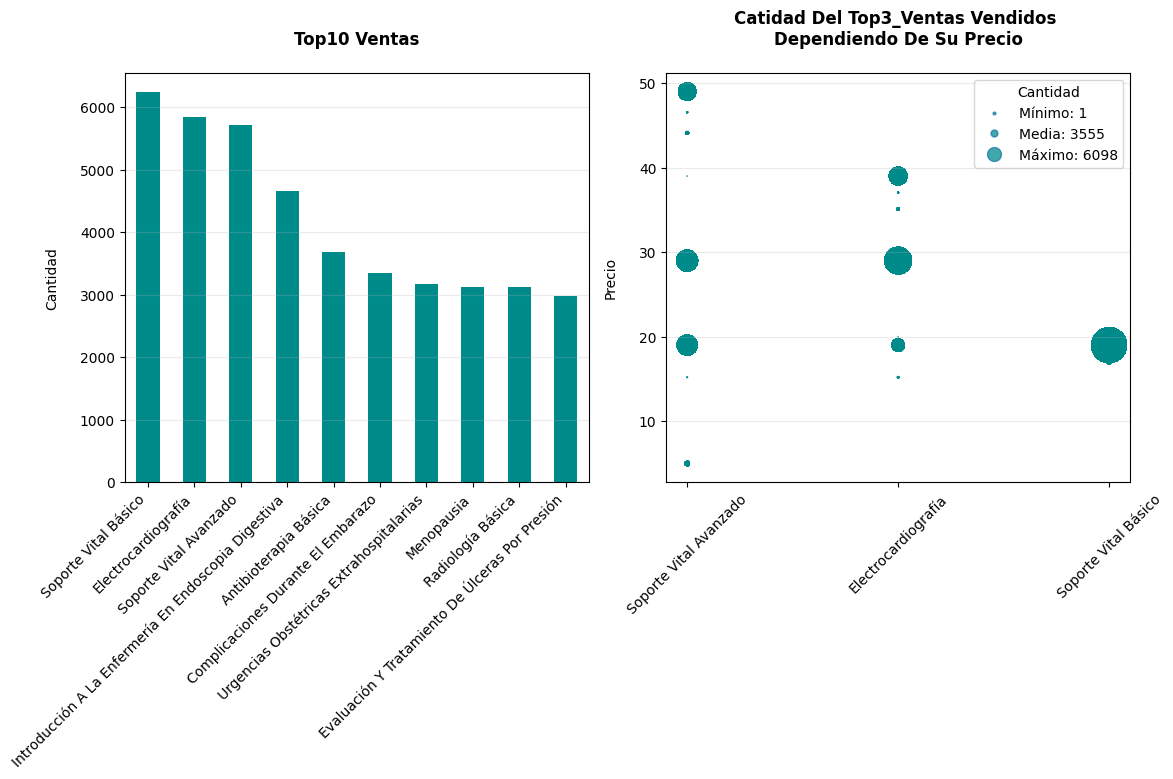

In [7]:
pw_top_ventas(data_fact_wo_pack)

<br>

### Top Facturación

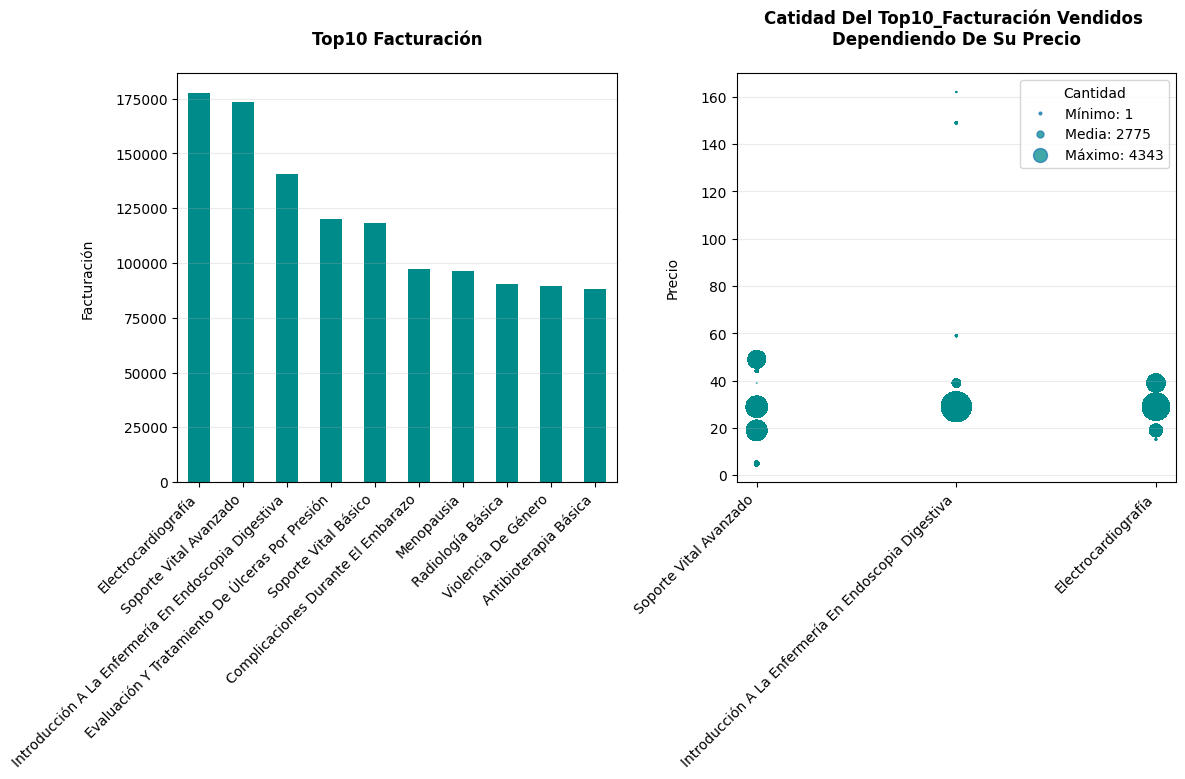

In [7]:
pw_top_facturacion(data_fact_wo_pack)

<br>

### ¿Cada cuánto tiempo vuelve a comprar una formación el alumnado?

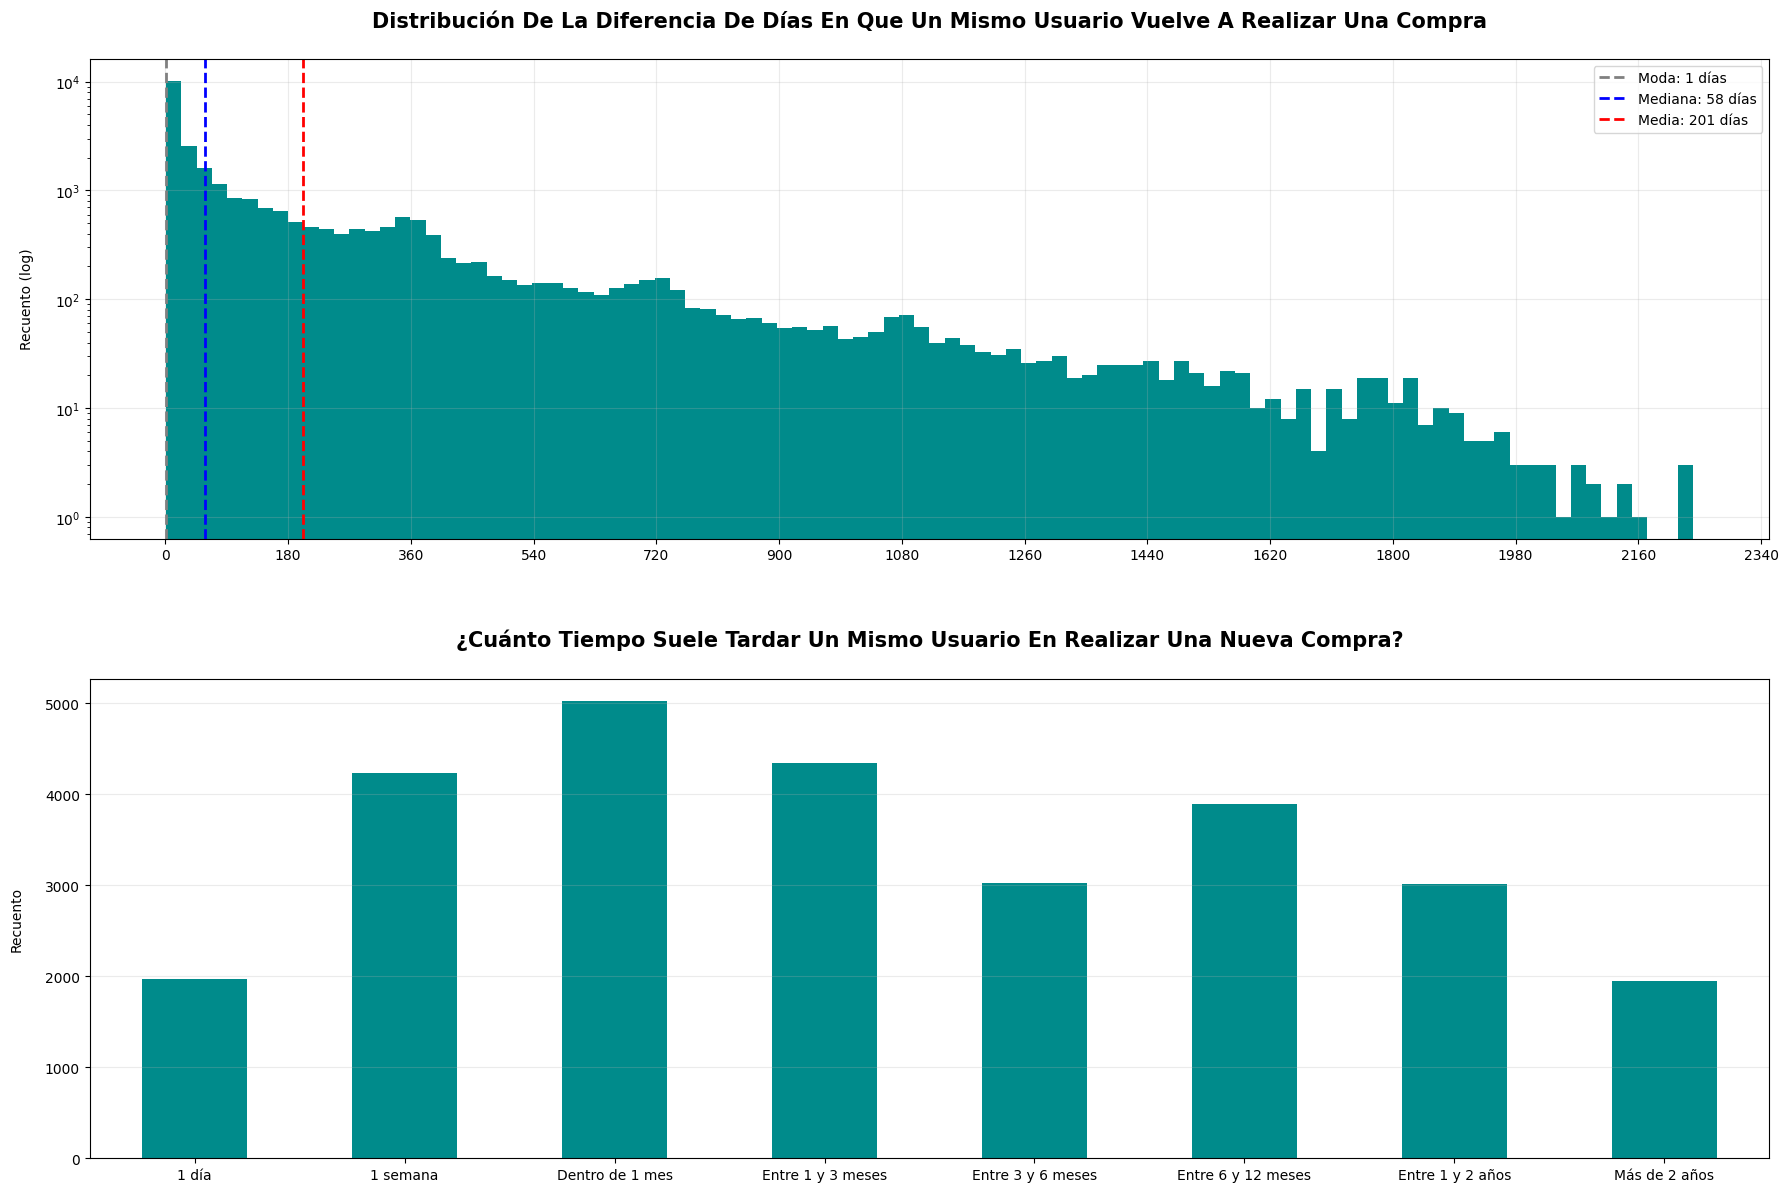

In [5]:
pw_diff_fechas(data_fact_wo_pack)

<br>

# Usuarios que han comprado el top3 facturación

<br>

#### ¿Qué cursos son los que más se compran después de comprar los curso del Top3?

Es decir, ¿cuál es la secuencia de cursos comprados tras comprar uno de los cursos de top3 que más facturan?

- ``Next_1`` -->  Representa ``el top3 más frecuentemente`` tras comprar el Curso Top.
- ``Next_2`` -->  Muestra los tres cursos más comprados, ``con un salto de un curso``, tras la compra del Curso Top.
- ``Next_3`` -->  Muestra lso tres cursos más comprados, ``con un salto de dos cursos``, tras la compra del Curso Top.

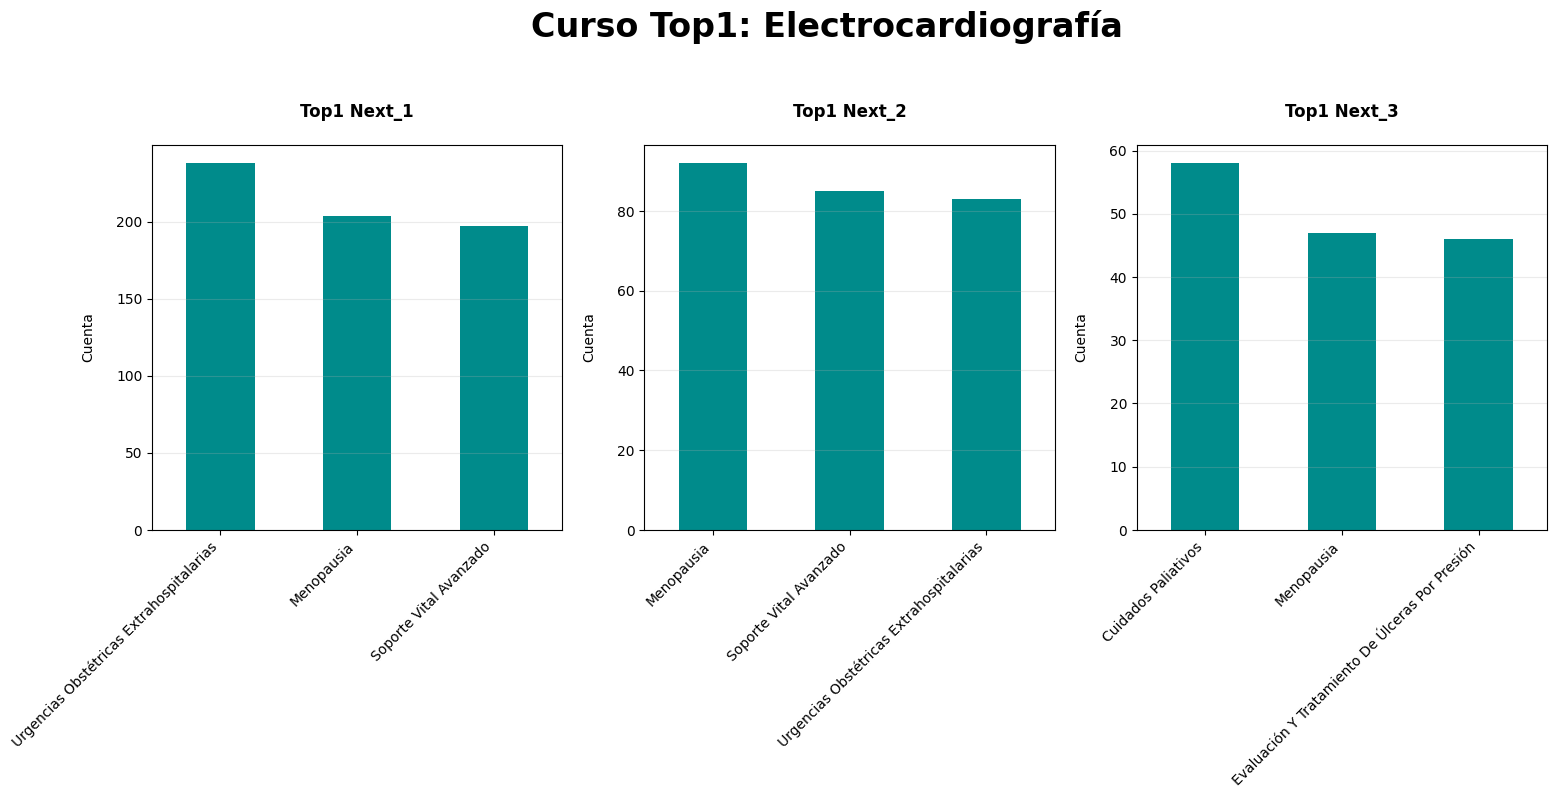

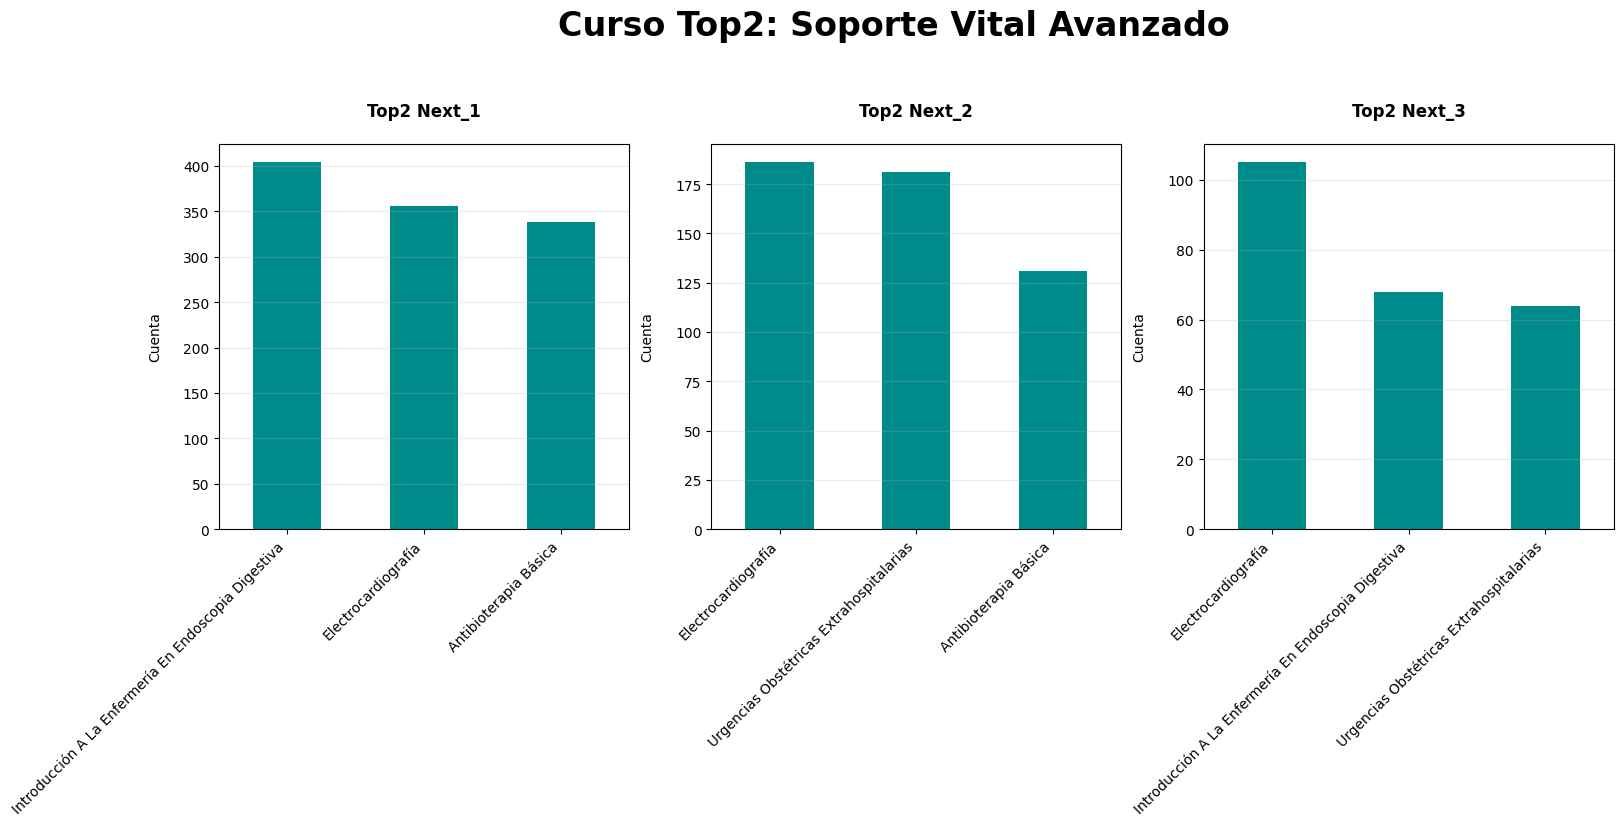

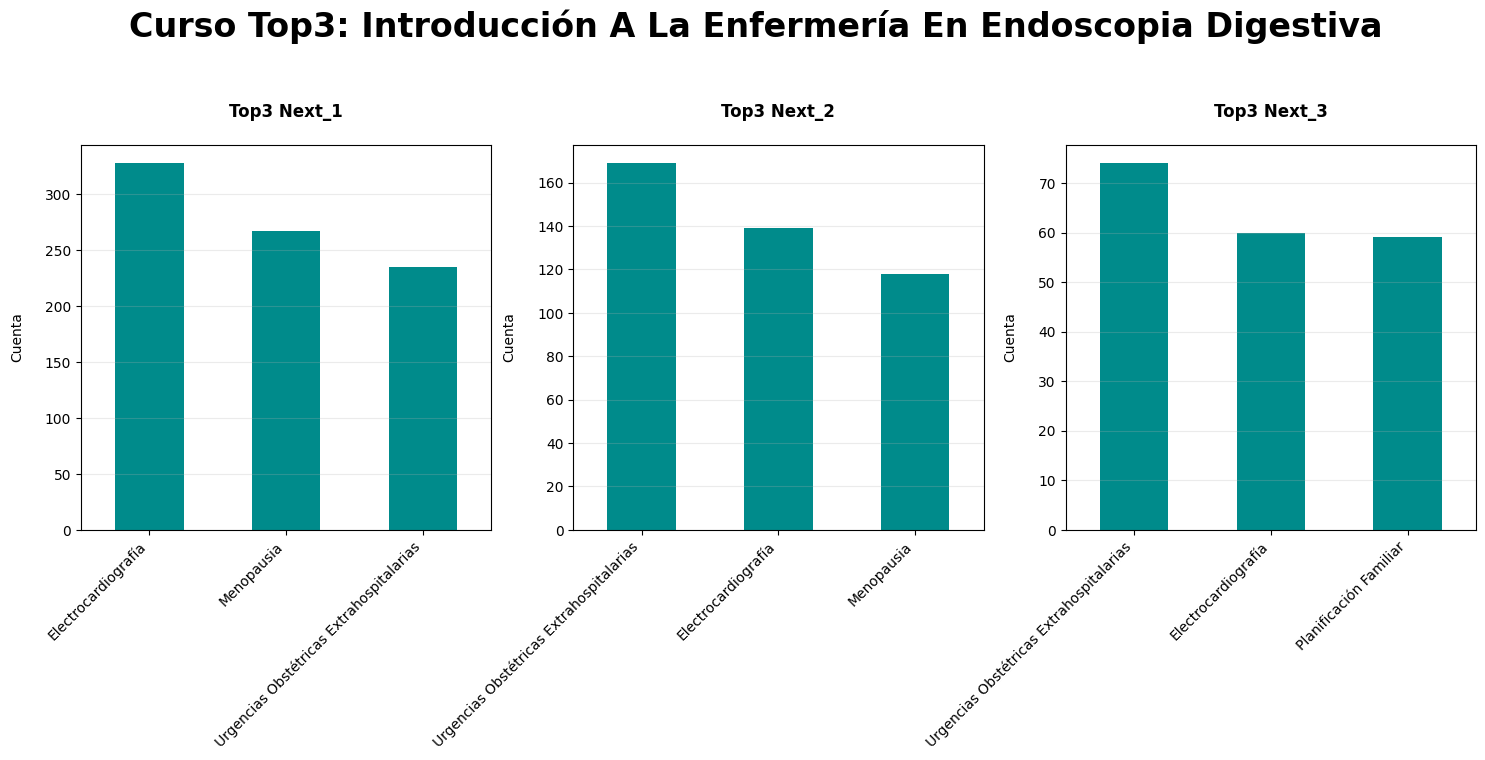

In [5]:
top_courses(data_fact_wo_pack)

<br>

# Extraer métricas de la diferencia de fechas en la secuencia de compra de cada curso TOP

- El ``histograma`` representará la distribución de la diferencia de días que tarda un usuario en comprar un nuevo curso en la secuencia de comprar tras comprar el curso TOP.
- El ``boxplot`` mostrará métricas más claras de esa distribución (la del histograma).

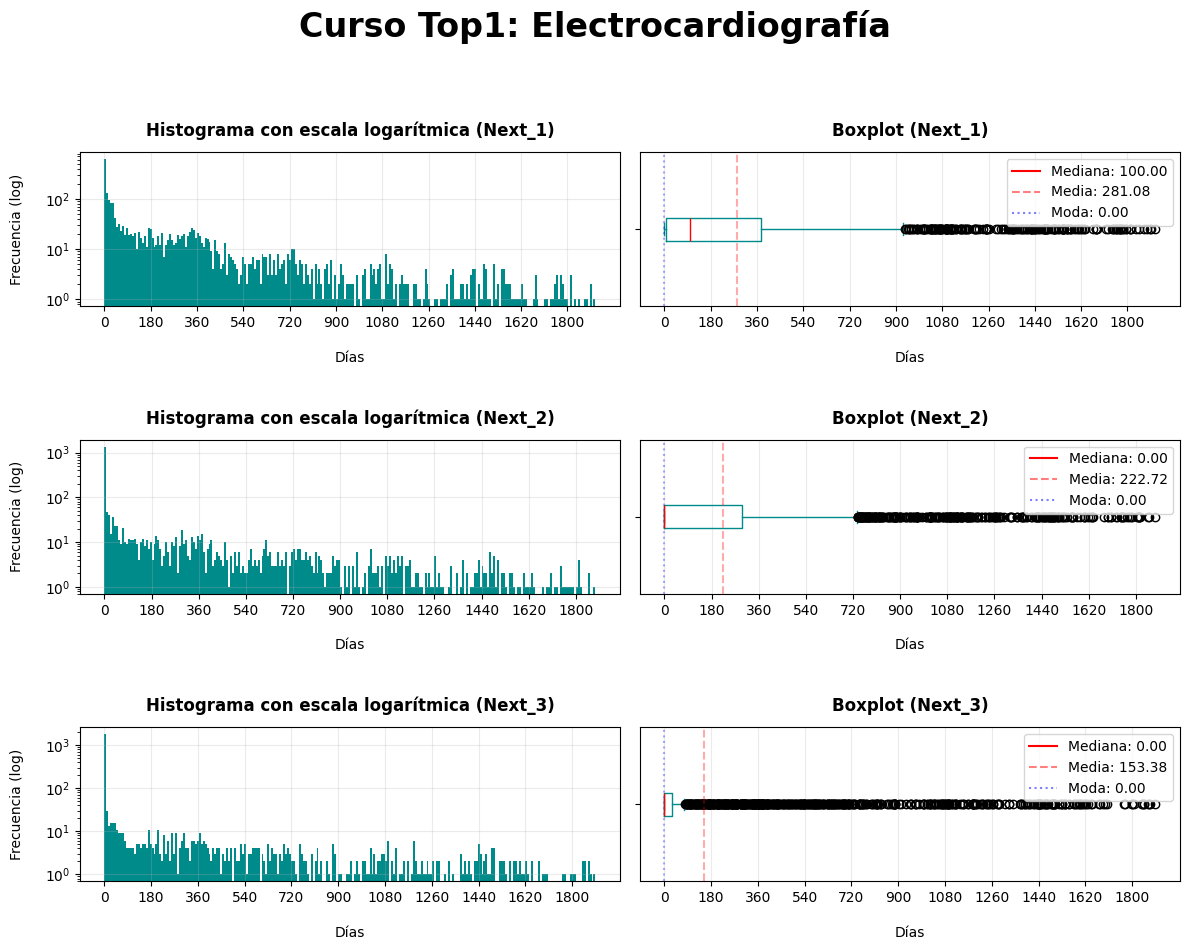

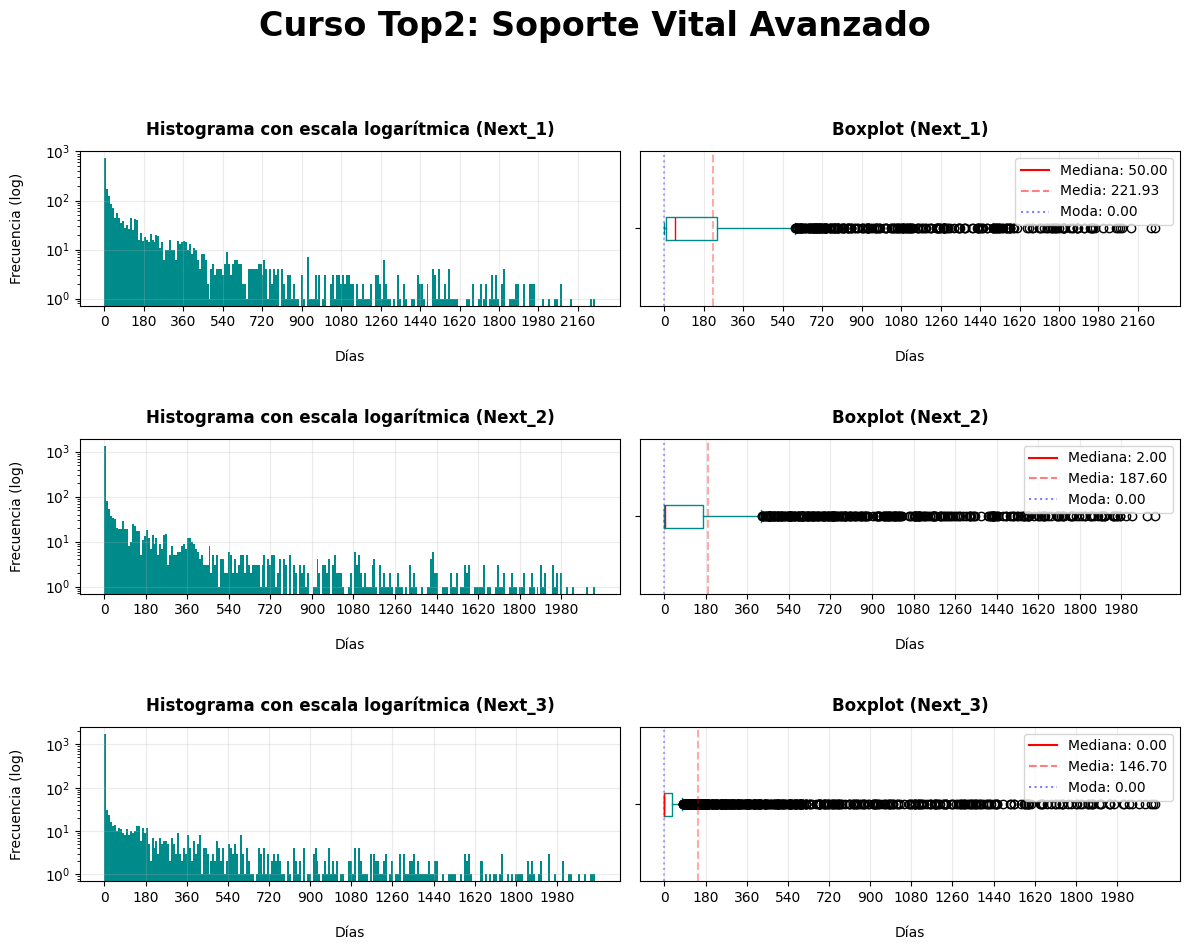

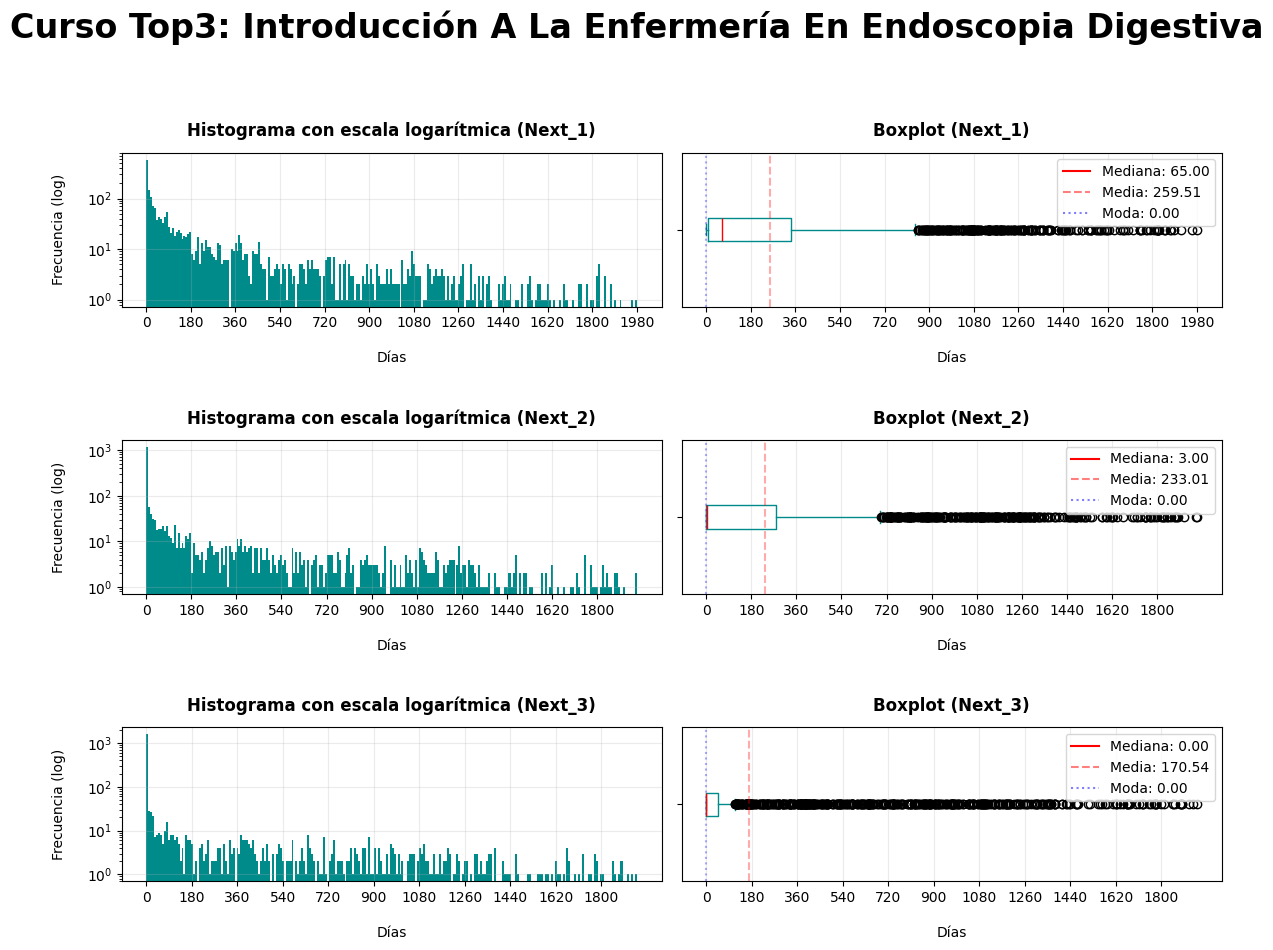

In [5]:
times(data_fact_wo_pack)

<br>

# Obtener más información sobre la facturación

<br>

### Facturación por año

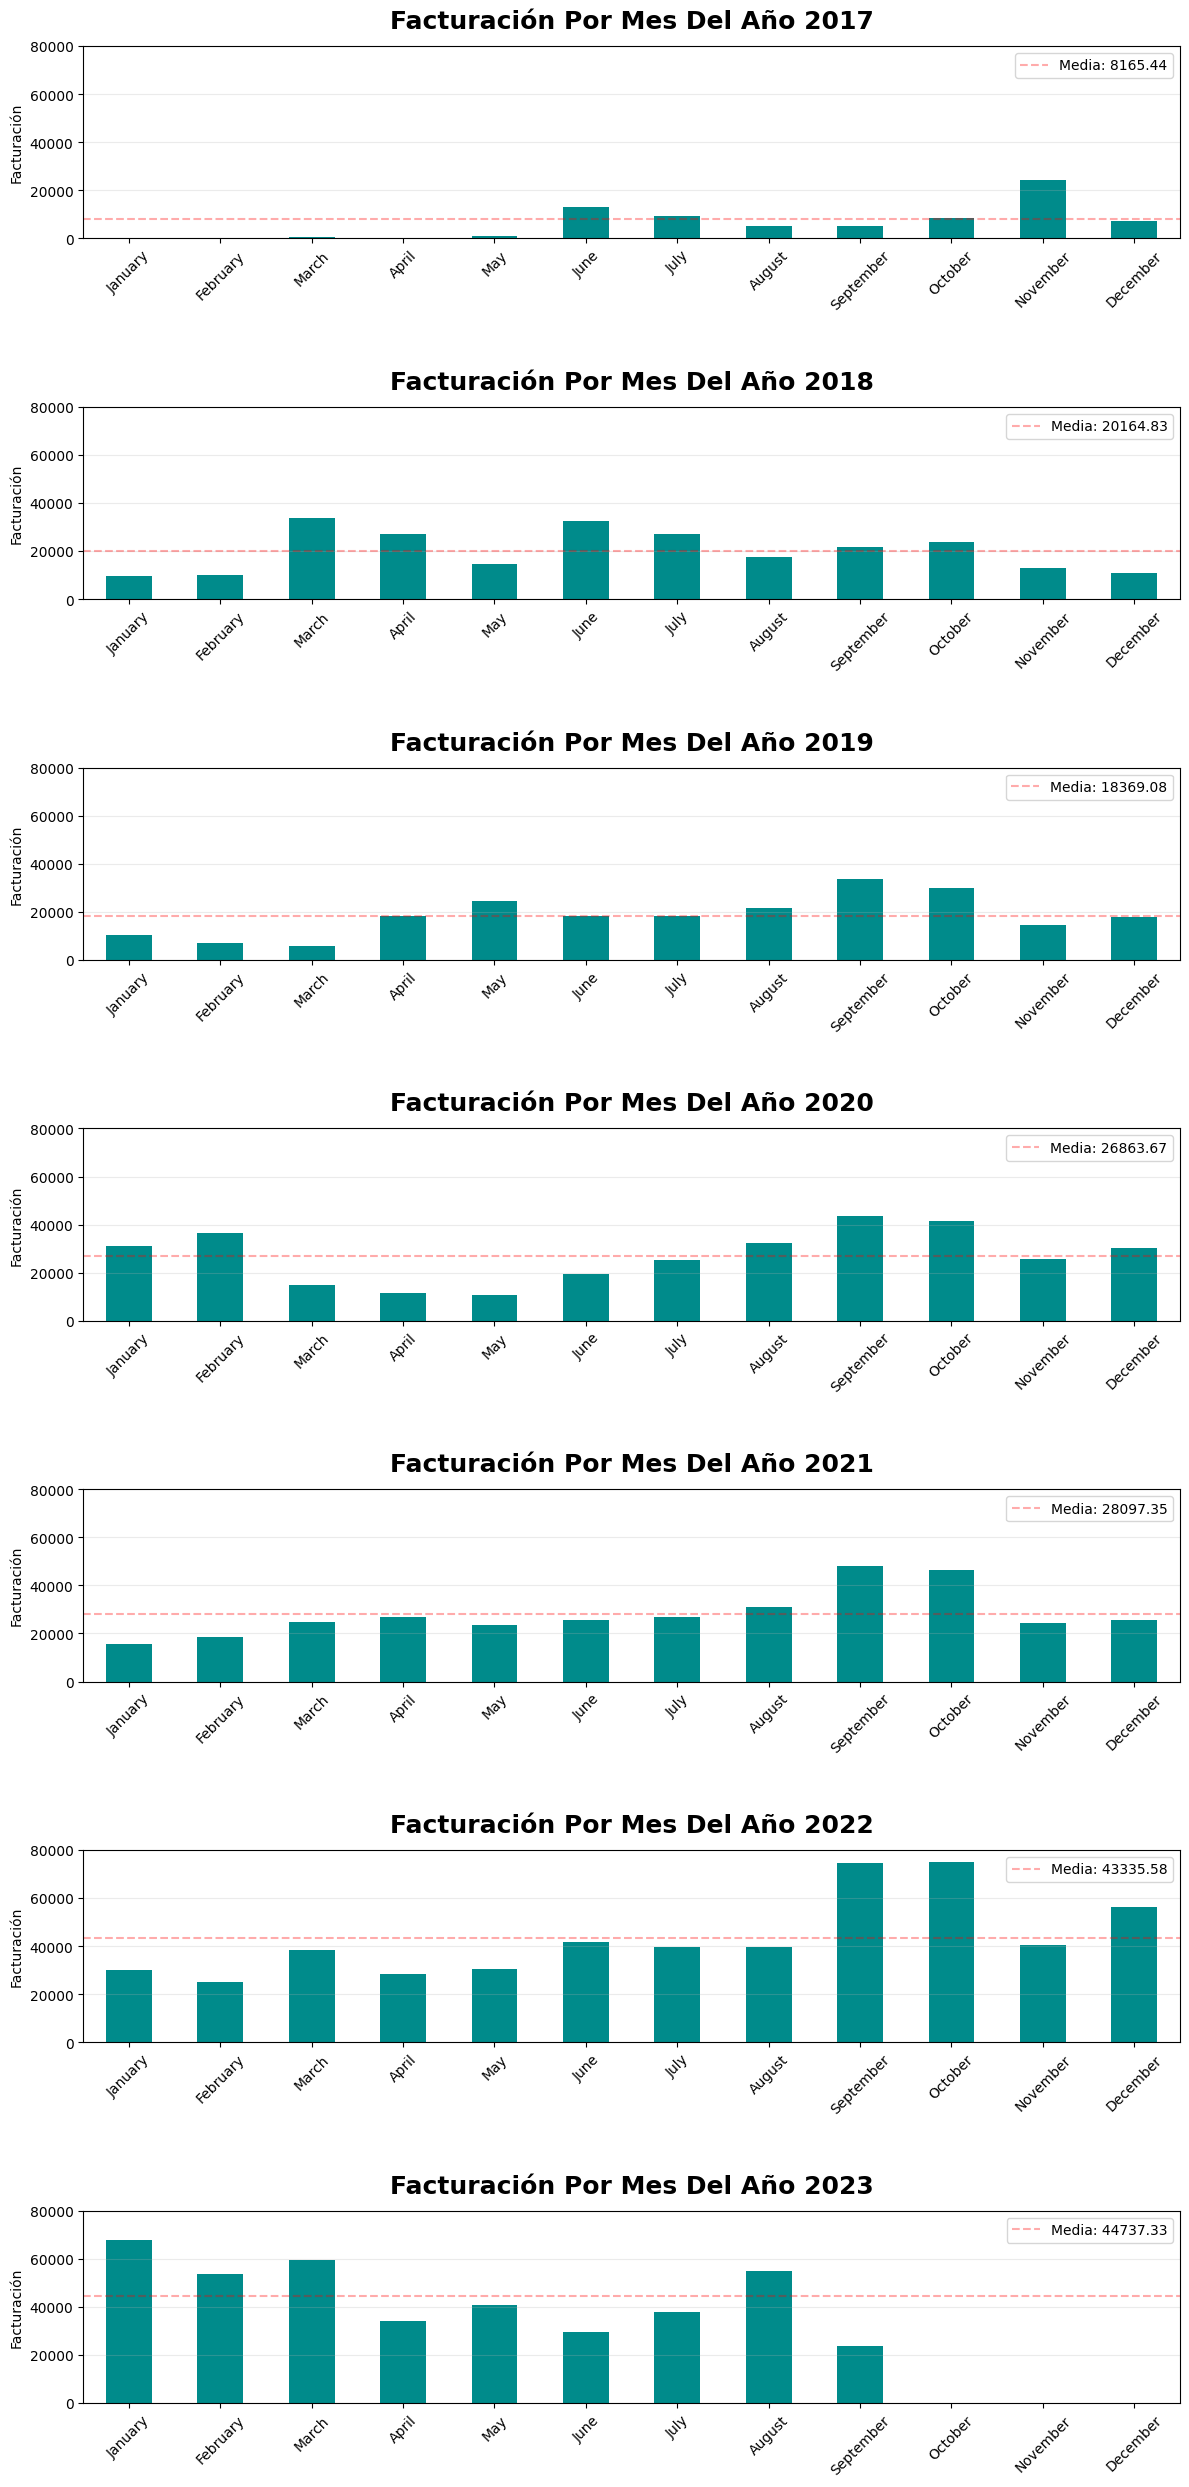

In [5]:
pw_facturacion_anual(data_fact_wo_pack)

Es muy destacable que la media a ido creciendo cada año (y 2023 aún no ha terminado) 💪

<br>

### Meses de mejor y peor facturación

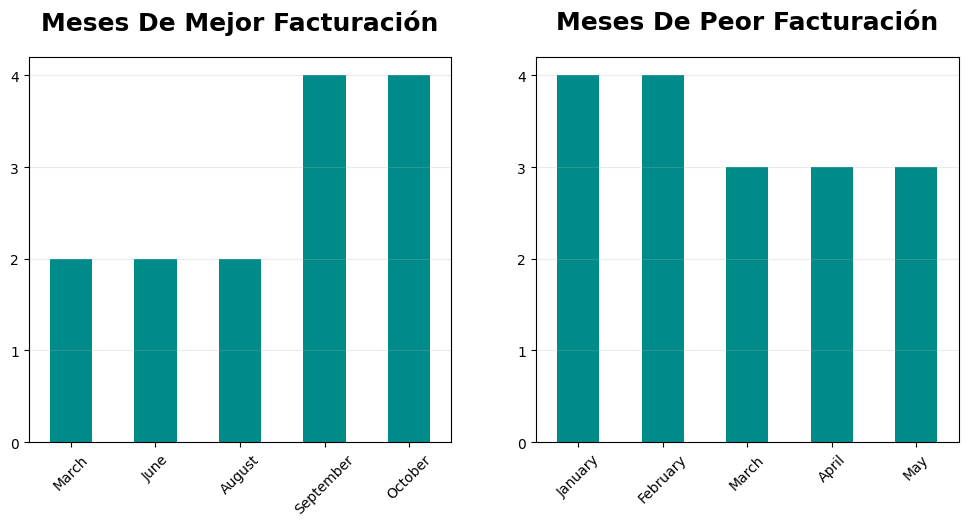

In [5]:
pw_mejor_peor_facturacion(data_fact_wo_pack)